<a href="https://colab.research.google.com/github/pikworatai/DS_514-515_Modeling/blob/main/Project_Final_Pizza_Delivery_Predict_Delayed_Ver4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DS514/515 Final Project**

# หัวข้อ : **ทำนายโอกาสในการเกิด Order Pizza ที่ Delay**

**สมาชิก:**
<br>1) นางสาวธนภรณ์ เรืองแก้วมณี (ID: 68199160270)
<br>2) นางสาววรทัย เลิศมั่นคงเดช (ID : 68199160294​)
<br>3) นางสาวอัญวิกา เกศวรกุล (ID : 68199160308​)
<br><br>

**Dataset:** Pizza Delivery Data Set <br>
**link Source:** https://www.kaggle.com/code/devraai/pizza-delivery-data-analysis/input

* Order ID - Unique identifier for each pizza order
* Restaurant Name - Name of the restaurant
* Location - City and state of the restaurant
* Order Date - Date when the order was placed
* Order Time - Time when the order was placed
* Delivery Date - Date of delivery
* Delivery Time - Time when the order was delivered
* Delivery Duration (min) - Time taken for the delivery in minutes
* Pizza Size - Size of the pizza ordered
* Pizza Type - Type of pizza based on ingredients
* Toppings Count - Number of toppings added
* Distance (km) - Distance from restaurant to delivery location
* Traffic Level - Level of traffic during delivery
* Payment Method - Method used for payment
* Is Peak Hour - Whether the order was placed during peak hours
* Is Weekend - Whether the order was placed on a weekend
* Delivery Efficiency (min/km) - Delivery time efficiency per km
* Topping Density - Ratio of toppings count per distance
* Order Month - Month in which the order was placed
* Payment Category - Online or offline mode of payment
* Estimated Duration (min) - Predicted delivery time
* Delay (min) - Extra minutes beyond estimated time
* Is Delayed - Whether the order was delayed
* Pizza Complexity - Complexity score of pizza
* Traffic Impact - Traffic influence on delivery time (scale 1–3)
* Order Hour - Hour of the day when the order was placed
* Restaurant Avg Time - Average time taken by the restaurant for delivery

**Feature**
1. Order Month
2. Order Hour
3. Is Peak Hour
4. Is Weekend
5. Restaurant Name
6. Distance (km)
7. Traffic Level
8. Pizza Size
       
**Target**
Is_Delayed


**Model ที่ใช้ในการทำนาย**
1. Logistic Regression
2. K-Nearest Neighbors (KNN)


# **1. Import Libraries**

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **2. Map Google Drive เพื่อดึง Dataset มาใช้งาน**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
strPath = "/content/drive/MyDrive/Colab Notebooks/Project_Final"

# **2.1 Create Data Frame**

In [ ]:
df_pizza = pd.read_csv(strPath+'/Datasource_Pizza_delivery_cleasing.csv', sep=',')
print(type(df_pizza))
df_pizza.head(5)

<class 'pandas.core.frame.DataFrame'>


,Order ID,Restaurant Name,Location,OrderDate,OrderTime,DeliveryDate,DeliveryTime,Delivery Duration (min),Pizza Size,Pizza Type,...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",1/5/2024,6:30:00 PM,1/5/2024,6:45:00 PM,15,Medium,Veg,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2/14/2024,8:00:00 PM,2/14/2024,8:25:00 PM,25,Large,Non-Veg,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",3/21/2024,12:15:00 PM,3/21/2024,12:35:00 PM,20,Small,Vegan,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",4/10/2024,7:45:00 PM,4/10/2024,8:10:00 PM,25,XL,Cheese Burst,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",5/5/2024,1:00:00 PM,5/5/2024,1:20:00 PM,20,Medium,Non-Veg,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


# **2.2. Check Data and cleansing**

1.  Check Null
2.  Convert Data type ให้ถูกต้อง เช่น OrderDate , DeliveryDate เป็นต้น

In [ ]:
#Check Data มี่กี่ row
df_pizza.shape

(1004, 27)

In [ ]:
#Check Null
df_pizza.isnull().any()

,0
Order ID,False
Restaurant Name,False
Location,False
OrderDate,False
OrderTime,False
DeliveryDate,False
DeliveryTime,False
Delivery Duration (min),False
Pizza Size,False
Pizza Type,False


In [ ]:
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Order ID                      1004 non-null   object 
 1   Restaurant Name               1004 non-null   object 
 2   Location                      1004 non-null   object 
 3   OrderDate                     1004 non-null   object 
 4   OrderTime                     1004 non-null   object 
 5   DeliveryDate                  1004 non-null   object 
 6   DeliveryTime                  1004 non-null   object 
 7   Delivery Duration (min)       1004 non-null   int64  
 8   Pizza Size                    1004 non-null   object 
 9   Pizza Type                    1004 non-null   object 
 10  Toppings Count                1004 non-null   int64  
 11  Distance (km)                 1004 non-null   float64
 12  Traffic Level                 1004 non-null   object 
 13  Pay

In [ ]:
#Convert OrderDate and Deliverydate String to Date
df_pizza['OrderDate'] = pd.to_datetime(df_pizza['OrderDate'])
df_pizza['DeliveryDate'] = pd.to_datetime(df_pizza['DeliveryDate'])

In [ ]:
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order ID                      1004 non-null   object        
 1   Restaurant Name               1004 non-null   object        
 2   Location                      1004 non-null   object        
 3   OrderDate                     1004 non-null   datetime64[ns]
 4   OrderTime                     1004 non-null   object        
 5   DeliveryDate                  1004 non-null   datetime64[ns]
 6   DeliveryTime                  1004 non-null   object        
 7   Delivery Duration (min)       1004 non-null   int64         
 8   Pizza Size                    1004 non-null   object        
 9   Pizza Type                    1004 non-null   object        
 10  Toppings Count                1004 non-null   int64         
 11  Distance (km)                 

In [ ]:
#Convert OrderTime and DeliveryTime to Time Stamp

df_pizza['OrderTime']= pd.to_datetime(df_pizza['OrderTime'], format="%I:%M:%S %p").dt.time
df_pizza['DeliveryTime']= pd.to_datetime(df_pizza['DeliveryTime'], format="%I:%M:%S %p").dt.time

In [ ]:
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order ID                      1004 non-null   object        
 1   Restaurant Name               1004 non-null   object        
 2   Location                      1004 non-null   object        
 3   OrderDate                     1004 non-null   datetime64[ns]
 4   OrderTime                     1004 non-null   object        
 5   DeliveryDate                  1004 non-null   datetime64[ns]
 6   DeliveryTime                  1004 non-null   object        
 7   Delivery Duration (min)       1004 non-null   int64         
 8   Pizza Size                    1004 non-null   object        
 9   Pizza Type                    1004 non-null   object        
 10  Toppings Count                1004 non-null   int64         
 11  Distance (km)                 

In [ ]:
df_pizza.head(5)

,Order ID,Restaurant Name,Location,OrderDate,OrderTime,DeliveryDate,DeliveryTime,Delivery Duration (min),Pizza Size,Pizza Type,...,Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05,18:30:00,2024-01-05,18:45:00,15,Medium,Veg,...,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14,20:00:00,2024-02-14,20:25:00,25,Large,Non-Veg,...,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21,12:15:00,2024-03-21,12:35:00,20,Small,Vegan,...,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10,19:45:00,2024-04-10,20:10:00,25,XL,Cheese Burst,...,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05,13:00:00,2024-05-05,13:20:00,20,Medium,Non-Veg,...,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458


In [ ]:
df_pizza.describe()

,OrderDate,DeliveryDate,Delivery Duration (min),Toppings Count,Distance (km),Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
count,1004,1004,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000
mean,2025-01-16 21:13:37.529880576,2025-01-16 21:13:37.529880576,29.492032,3.362550,4.945618,6.397006,0.714684,11.869482,17.622550,9.468127,2.049801,18.691235,29.492032
min,2024-01-05 00:00:00,2024-01-05 00:00:00,15.000000,1.000000,2.000000,4.166667,0.266667,4.800000,9.000000,1.000000,1.000000,12.000000,26.666667
25%,2024-08-30 18:00:00,2024-08-30 18:00:00,25.000000,3.000000,3.500000,5.000000,0.600000,8.400000,15.200000,6.000000,1.000000,18.000000,28.844221
50%,2025-01-30 00:00:00,2025-01-30 00:00:00,30.000000,3.000000,4.500000,6.000000,0.666667,10.800000,17.800000,6.000000,2.000000,19.000000,29.948454
75%,2025-06-04 06:00:00,2025-06-04 06:00:00,30.000000,4.000000,6.000000,7.142857,0.833333,14.400000,20.400000,12.000000,3.000000,20.000000,30.259434
max,2025-12-31 00:00:00,2025-12-31 00:00:00,50.000000,5.000000,10.000000,12.500000,1.500000,24.000000,30.080000,20.000000,3.000000,21.000000,30.286458
std,NaN,NaN,7.753103,1.135853,1.951463,1.562573,0.203020,4.683510,3.964289,6.233731,0.775696,1.529466,0.859941


# **3. Explore Data Analysis (EDA)**

In [ ]:
numeric_df = df_pizza.select_dtypes(include=[np.number])
numeric_df.head(5)

,Delivery Duration (min),Toppings Count,Distance (km),Delivery Efficiency (min/km),Topping Density,Estimated Duration (min),Delay (min),Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,15,3,2.5,6.000000,1.200000,6.0,9.0,6,2,18,30.259434
1,25,4,5.0,5.000000,0.800000,12.0,13.0,12,3,20,28.186275
2,20,2,3.0,6.666667,0.666667,7.2,12.8,2,1,12,28.844221
3,25,5,4.5,5.555556,1.111111,10.8,14.2,20,2,19,29.948454
4,20,3,2.0,10.000000,1.500000,4.8,15.2,6,3,13,30.286458


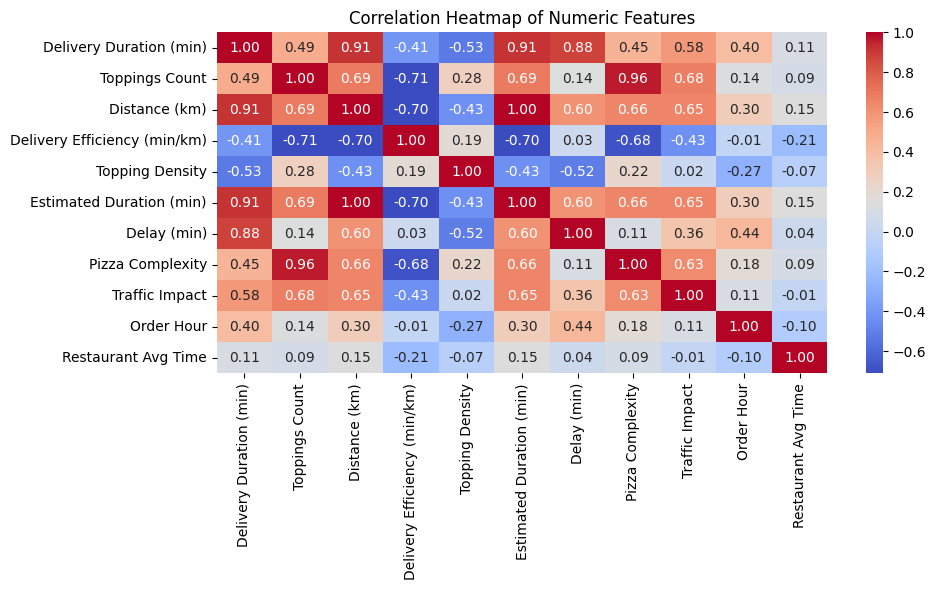

In [ ]:
# Correlation heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.tight_layout()
plt.show()

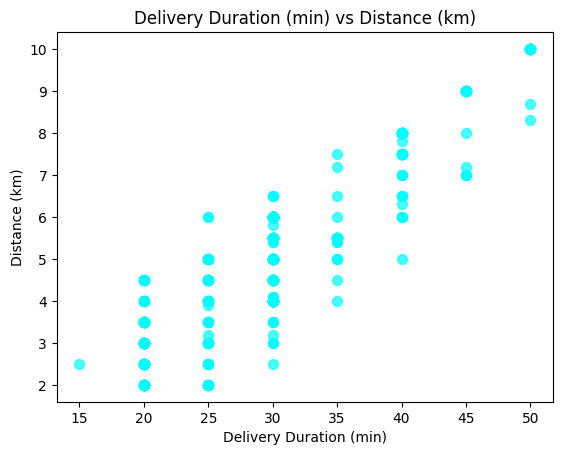

Pearson Correlation Coefficient (r): 0.913


In [ ]:
# Generate some sample data
x_correlation = df_pizza['Delivery Duration (min)']
y_correlation = df_pizza['Distance (km)']

# Create the scatter plot
plt.scatter(x_correlation, y_correlation, color='cyan', marker='o', s=50, alpha=0.7)

# Add labels and a title
plt.xlabel("Delivery Duration (min)")
plt.ylabel("Distance (km)")
plt.title("Delivery Duration (min) vs Distance (km)")

# Show the plot
plt.show()
correlation_matrix = np.corrcoef(x_correlation, y_correlation)
corr_coef_numpy = correlation_matrix[0, 1]
print(f"Pearson Correlation Coefficient (r): {corr_coef_numpy:.3f}")

จากกราฟ จะเห็นได้ว่า ระยะทาง และ ระยะเวลาในการจัดการส่งสินค้า มีความสัมพันธ์กันเชิงบวก โดยมีค่า Correlation  = 0.913 ซึ่งเข้าใกล้ 1 แสดงว่ามีความสัมพันธ์กันอย่างมาก โดยจะเห็นว่าระยะทาง (Distance) เพิ่มขึ้น แนวโน้มของ ระยะเวลาในการจัดส่ง (Delivery Duration) ก็จะเพิ่มขึ้นตามไปด้วย

Text(0.5, 1.0, 'Box Plot of Delivery Duration (min) by Restaurant Name')

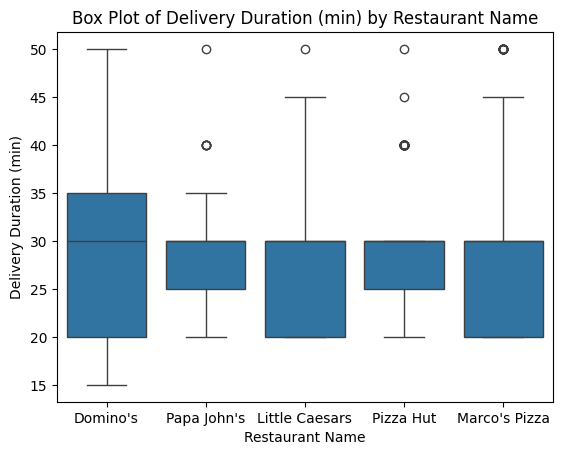

In [ ]:
bp1 =sns.boxplot(x= df_pizza['Restaurant Name'] ,y= df_pizza['Delivery Duration (min)'])
bp1.set_xlabel('Restaurant Name')

plt.title('Box Plot of Delivery Duration (min) by Restaurant Name')


### สรุป

1.  **เวลาเฉลี่ย:** ทุกร้านใช้เวลาจัดส่งโดยเฉลี่ย (Median) ใกล้เคียงกันที่ **30 นาที**
2.  **ความเร็วสูงสุด:** Domino's มีการจัดส่งที่เร็วที่สุด **15 นาที** (ค่าต่ำสุดของ Whiskers)
3.  **ความสม่ำเสมอ:** **Papa John's** และ **Pizza Hut** น่าจะเป็นทางเลือกที่ดีที่สุด หากต้องการเวลาจัดส่งที่สม่ำเสมอและคาดเดาได้
4.  **ความเสี่ยงช้าผิดปกติ:** ทุกร้านยกเว้น Domino's มีความเสี่ยงที่จะเกิดการจัดส่งที่ **นานผิดปกติ** (Outliers) ถึง 50 นาที

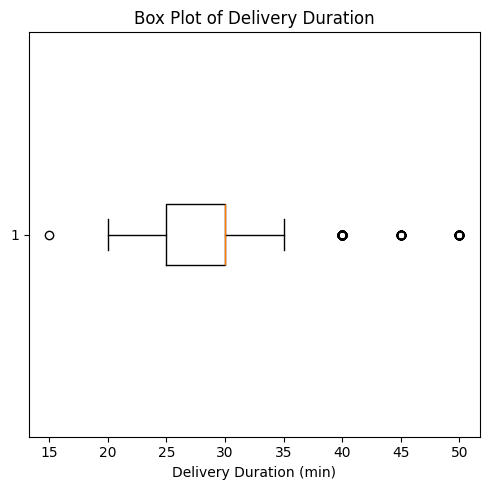

In [ ]:
#Boxplot for Delivery Duration(Min)
plt.figure(figsize=(5,5))
plt.boxplot(df_pizza['Delivery Duration (min)'], vert=False)
plt.title('Box Plot of Delivery Duration')
plt.xlabel('Delivery Duration (min)')
plt.tight_layout()
plt.show()

## สรุปผล Box Plot ระยะเวลาจัดส่ง (Delivery Duration)

กราฟ Box Plot นี้แสดงการกระจายตัวของ **ระยะเวลาในการจัดส่ง (Delivery Duration)** เป็นนาที ซึ่งสามารถสรุปได้ตามองค์ประกอบหลักดังนี้:

---

### 1. ค่ากลางและการกระจุกตัวของข้อมูล

* **มัธยฐาน (Median):** เส้นกลางในกล่องอยู่ที่ประมาณ **30 นาที** หมายความว่า 50% ของการจัดส่งทั้งหมดใช้เวลาน้อยกว่าหรือเท่ากับ 30 นาที
* **(Q1):** ขอบซ้ายของกล่องอยู่ที่ประมาณ **25 นาที**
* **(Q3):** ขอบขวาของกล่องอยู่ที่ประมาณ **30 นาที**

> **ข้อสรุป:** การจัดส่งส่วนใหญ่อยู่ในช่วงที่ **รวดเร็วและสม่ำเสมอ** โดย **50% ของข้อมูล (ระหว่าง Q1 ถึง Q3)

---
### 2. ค่าผิดปกติ (Outliers)

* **Outliers ด้านซ้าย:** มีค่าผิดปกติ 1 จุดที่ประมาณ **15 นาที** (การจัดส่งที่เร็วกว่าปกติมาก)
* **Outliers ด้านขวา:** มีค่าผิดปกติ 3 จุดที่ประมาณ **40, 45, และ 50 นาที** (การจัดส่งที่ช้ากว่าปกติมาก)

> **ข้อสรุป:** ถึงแม้ว่าการจัดส่งส่วนใหญ่จะเสร็จสิ้นภายใน 30 นาที แต่ก็มีปัญหา **การจัดส่งที่ล่าช้าอย่างผิดปกติ** (40-50 นาที)

**โดยสรุป:** ระบบการจัดส่งนี้มีประสิทธิภาพสูงและรวดเร็วสำหรับออร์เดอร์ส่วนใหญ่ แต่มีความเสี่ยงที่จะเกิดการล่าช้าอย่างรุนแรงในบางกรณี

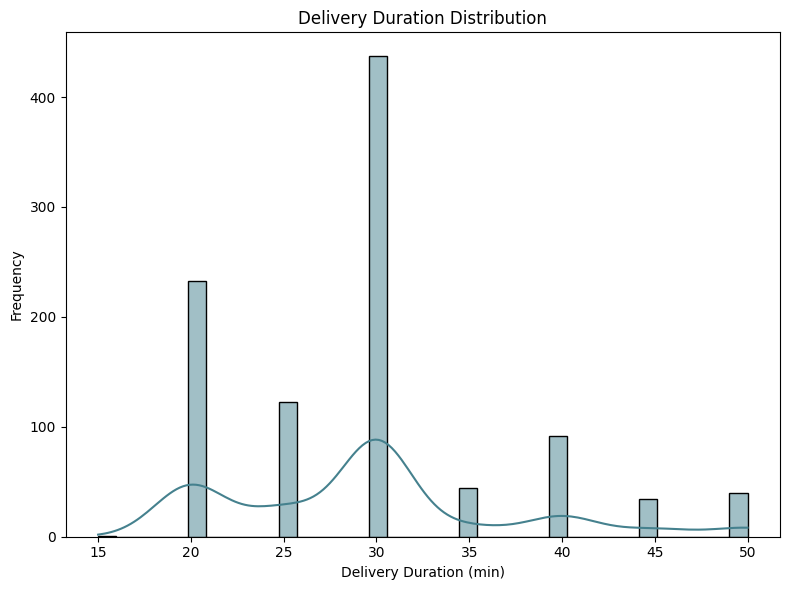

In [ ]:
#Frequency By Delivery Duration
#freq = df_pizza['Delivery Duration (min)'].value_counts()

plt.figure(figsize=(8, 6))
sns.histplot(df_pizza['Delivery Duration (min)'], kde=True,color="#45818e")
plt.title('Delivery Duration Distribution')
plt.xlabel('Delivery Duration (min)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Result: ส่วนใหญ่การจัดส่งอยู่ในช่วง 15–30 นาที แต่มี Outliers ที่สูงมาก (อาจเกิน 40–50 นาที)

/tmp/ipython-input-324863370.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pizza, x='Restaurant Name', palette='viridis')


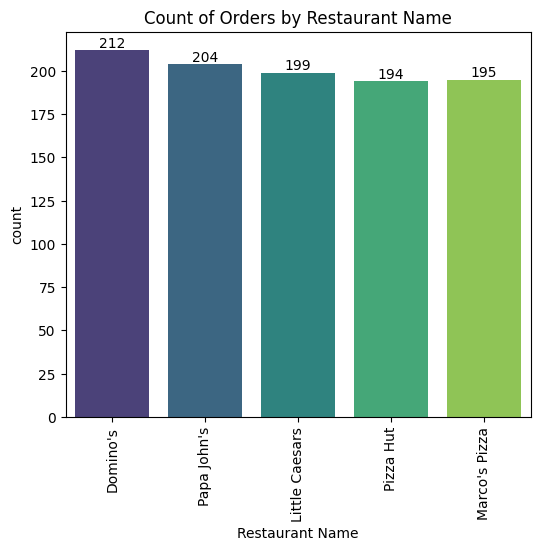

In [ ]:
#countplot จำนวน order ตามแต่ละ restuarant name
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_pizza, x='Restaurant Name', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Orders by Restaurant Name')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

Result: ร้าน Domino's มีการสั่งออร์เดอร์เข้ามามากที่สุด เป็นอันดับ 1

/tmp/ipython-input-3998334788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pizza, x='Pizza Size', palette='viridis')


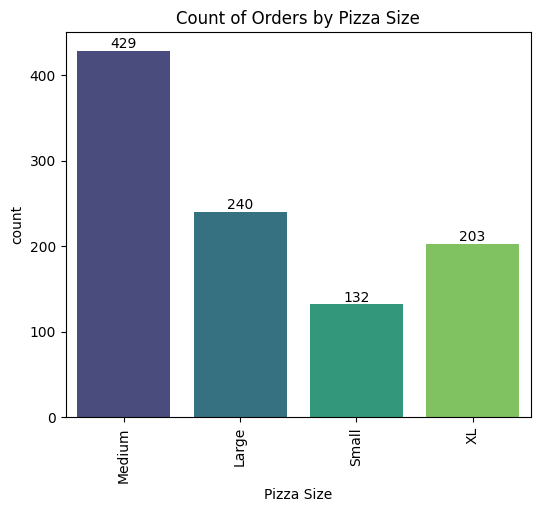

In [ ]:
#countplot จำนวน order ตามแต่ละ Pizza Size
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_pizza, x='Pizza Size', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Orders by Pizza Size')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

Result: ออเดอร์ส่วนใหญ่จะสั่ง Size Medium

/tmp/ipython-input-3970411096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pizza, x='Traffic Level', palette='viridis')


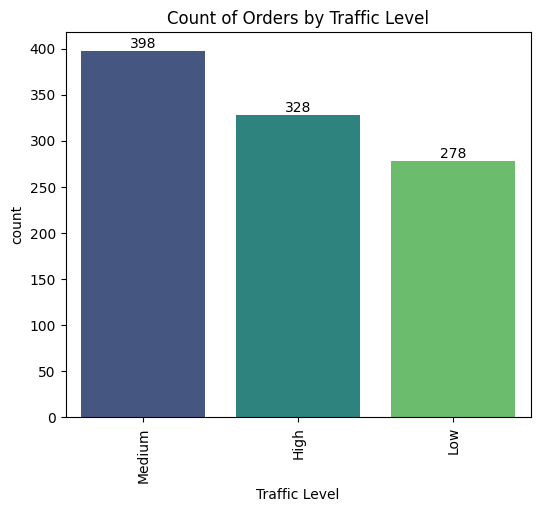

In [ ]:
#countplot จำนวน order ตามแต่ละ Traffic Level
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_pizza, x='Traffic Level', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Orders by Traffic Level')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

/tmp/ipython-input-3717373089.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pizza, x='Is Peak Hour', palette='viridis')


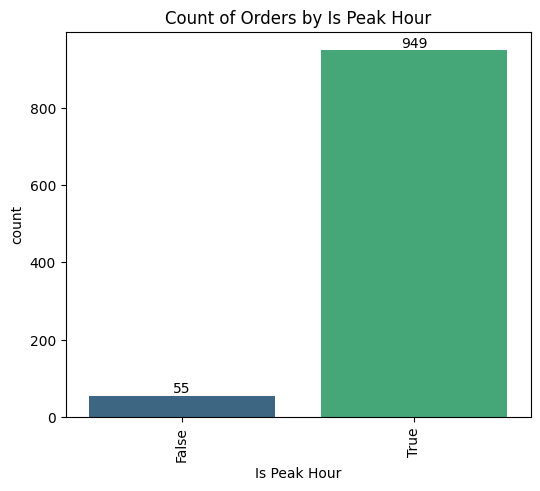

In [ ]:
#countplot จำนวน order ตามแต่ละ Is Peak Hour
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_pizza, x='Is Peak Hour', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Orders by Is Peak Hour')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

/tmp/ipython-input-1863022046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pizza, x='Is Weekend', palette='viridis')


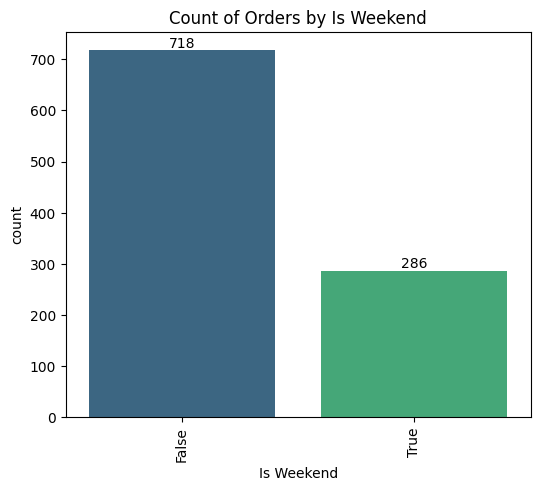

In [ ]:
#countplot จำนวน order ตามแต่ละ Is Weekend
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_pizza, x='Is Weekend', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Orders by Is Weekend')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

/tmp/ipython-input-2850449476.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pizza, x='Order Month', palette='viridis')


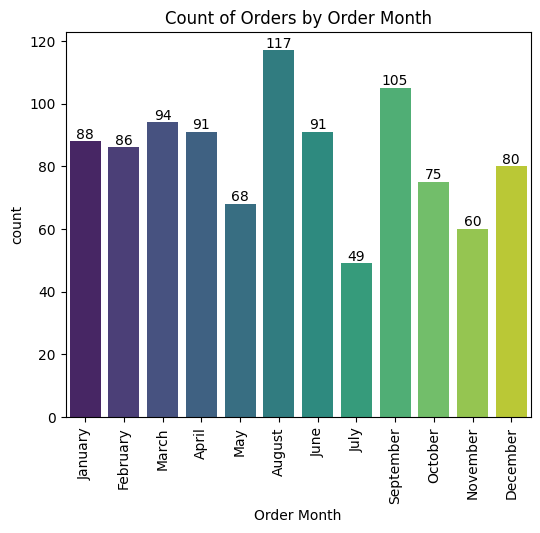

In [ ]:
#countplot จำนวน order ตามแต่ละ Order Month
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_pizza, x='Order Month', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Orders by Order Month')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

/tmp/ipython-input-2476597622.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pizza, x='Pizza Complexity', palette='viridis')


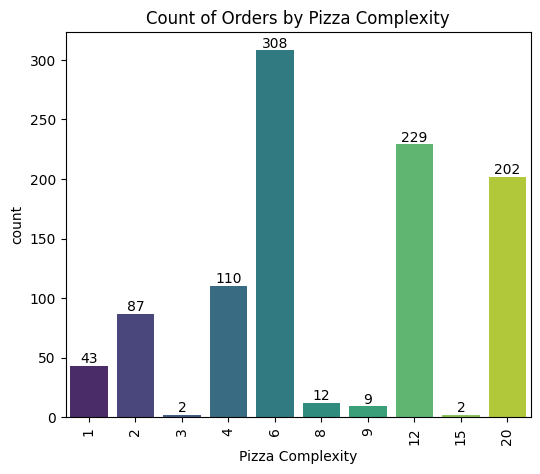

In [ ]:
#countplot จำนวน order ตามแต่ละ Pizza Complexity
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_pizza, x='Pizza Complexity', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Orders by Pizza Complexity')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

/tmp/ipython-input-1497321103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df_pizza, x='Is Delayed', palette='viridis')


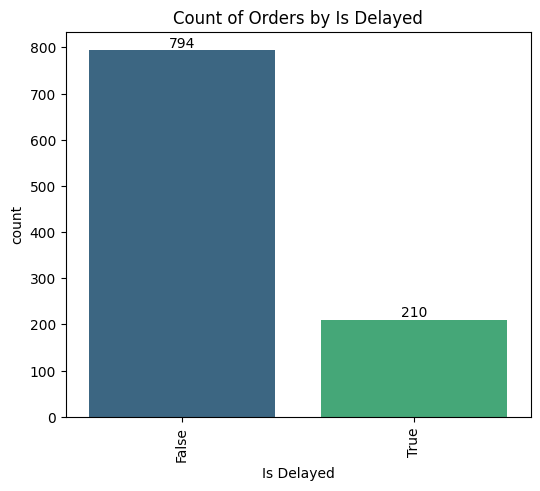

In [ ]:
#countplot จำนวน order ตามแต่ละ Is Delayed
plt.figure(figsize=(6, 5))
ax = sns.countplot(data=df_pizza, x='Is Delayed', palette='viridis')
plt.xticks(rotation=90)
plt.title('Count of Orders by Is Delayed')

for container in ax.containers:
    ax.bar_label(container, fontsize=10)

plt.show()

##สรุปผลการวิเคราะห์ข้อมูล (Key Findings from EDA)

1. ปัจจัยที่มีผลต่อเวลาส่ง (Key Predictor):
      *   Distance (km): มีความสัมพันธ์ (Correlation) กับ Delivery Duration สูงมาก (r = 0.913) แปลว่า "ยิ่งไกล ยิ่งนาน" ซึ่งเป็นปัจจัยหลักในการกำหนดว่าจะล่าช้าหรือไม่

2. ประสิทธิภาพของร้านค้า:Domino's:
      *   มีแนวโน้มส่งเร็วที่สุด (Median time ต่ำสุด) และมีความเสี่ยงเกิด Outlier (ส่งช้าผิดปกติ) น้อยที่สุดเมื่อเทียบกับร้านอื่น
      *   Outliers: พบการส่งที่ล่าช้าผิดปกติ (40-50 นาที) ในร้านอื่นๆ เกือบทั้งหมด ยกเว้น Domino's

3. พฤติกรรมการสั่ง:
      *   ลูกค้าส่วนใหญ่นิยมสั่งไซส์ Medium มากที่สุด
      *   ช่วงเวลา Peak Hour มีจำนวนออร์เดอร์สูงกว่าช่วงเวลาปกติอย่างเห็นได้ชัด

# 4.**Data pre-processing**

In [ ]:
df_pizza['Is Peak Hour2'] = df_pizza['Is Peak Hour'].astype(int)

In [ ]:
df_pizza['Is Delayed2'] = df_pizza['Is Delayed'].astype(int)

In [ ]:
df_pizza['Is Weekend2'] = df_pizza['Is Weekend'].astype(int)


df_pizza['Pizza Size2']  = df_pizza['Pizza Size'].map({
    'Small': 1,
    'Medium': 2,
    'Large': 3,
    'XL': 4
})


In [ ]:
df_pizza.head(5)

,Order ID,Restaurant Name,Location,OrderDate,OrderTime,DeliveryDate,DeliveryTime,Delivery Duration (min),Pizza Size,Pizza Type,...,Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time,Is Peak Hour2,Is Delayed2,Is Weekend2,Pizza Size2
0,ORD001,Domino's,"New York, NY",2024-01-05,18:30:00,2024-01-05,18:45:00,15,Medium,Veg,...,9.0,False,6,2,18,30.259434,1,0,0,2
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14,20:00:00,2024-02-14,20:25:00,25,Large,Non-Veg,...,13.0,False,12,3,20,28.186275,1,0,0,3
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21,12:15:00,2024-03-21,12:35:00,20,Small,Vegan,...,12.8,False,2,1,12,28.844221,0,0,0,1
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10,19:45:00,2024-04-10,20:10:00,25,XL,Cheese Burst,...,14.2,False,20,2,19,29.948454,1,0,0,4
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05,13:00:00,2024-05-05,13:20:00,20,Medium,Non-Veg,...,15.2,False,6,3,13,30.286458,0,0,1,2


In [ ]:
#df_pizza['Pizza Size2'].unique()
df_pizza[['Pizza Size2', 'Pizza Size']].value_counts()

,,count
Pizza Size2,Pizza Size,
2,Medium,429
3,Large,240
4,XL,203
1,Small,132


In [ ]:
df_pizza['Pizza Size2'].isnull()

,Pizza Size2
0,False
1,False
2,False
3,False
4,False
...,...
999,False
1000,False
1001,False
1002,False


In [ ]:
df_pizza = pd.get_dummies(df_pizza, columns=['Order Month'], prefix='month')

In [ ]:
df_pizza.head(5)

,Order ID,Restaurant Name,Location,OrderDate,OrderTime,DeliveryDate,DeliveryTime,Delivery Duration (min),Pizza Size,Pizza Type,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,ORD001,Domino's,"New York, NY",2024-01-05,18:30:00,2024-01-05,18:45:00,15,Medium,Veg,...,False,False,True,False,False,False,False,False,False,False
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14,20:00:00,2024-02-14,20:25:00,25,Large,Non-Veg,...,False,True,False,False,False,False,False,False,False,False
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21,12:15:00,2024-03-21,12:35:00,20,Small,Vegan,...,False,False,False,False,False,True,False,False,False,False
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10,19:45:00,2024-04-10,20:10:00,25,XL,Cheese Burst,...,False,False,False,False,False,False,False,False,False,False
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05,13:00:00,2024-05-05,13:20:00,20,Medium,Non-Veg,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df_pizza['month_January2'] = df_pizza['month_January'].astype(int)
df_pizza['month_February2'] = df_pizza['month_February'].astype(int)
df_pizza['month_March2'] = df_pizza['month_March'].astype(int)
df_pizza['month_April2'] = df_pizza['month_April'].astype(int)
df_pizza['month_May2'] = df_pizza['month_May'].astype(int)
df_pizza['month_June2'] = df_pizza['month_June'].astype(int)
df_pizza['month_July2'] = df_pizza['month_July'].astype(int)
df_pizza['month_August2'] = df_pizza['month_August'].astype(int)
df_pizza['month_September2'] = df_pizza['month_September'].astype(int)
df_pizza['month_October2'] = df_pizza['month_October'].astype(int)
df_pizza['month_November2'] = df_pizza['month_November'].astype(int)
df_pizza['month_December2'] = df_pizza['month_December'].astype(int)

In [ ]:
df_pizza.head(5)

,Order ID,Restaurant Name,Location,OrderDate,OrderTime,DeliveryDate,DeliveryTime,Delivery Duration (min),Pizza Size,Pizza Type,...,month_March2,month_April2,month_May2,month_June2,month_July2,month_August2,month_September2,month_October2,month_November2,month_December2
0,ORD001,Domino's,"New York, NY",2024-01-05,18:30:00,2024-01-05,18:45:00,15,Medium,Veg,...,0,0,0,0,0,0,0,0,0,0
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14,20:00:00,2024-02-14,20:25:00,25,Large,Non-Veg,...,0,0,0,0,0,0,0,0,0,0
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21,12:15:00,2024-03-21,12:35:00,20,Small,Vegan,...,1,0,0,0,0,0,0,0,0,0
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10,19:45:00,2024-04-10,20:10:00,25,XL,Cheese Burst,...,0,1,0,0,0,0,0,0,0,0
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05,13:00:00,2024-05-05,13:20:00,20,Medium,Non-Veg,...,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_pizza = pd.get_dummies(df_pizza, columns=['Restaurant Name'])

In [ ]:
df_pizza.head(5)

,Order ID,Location,OrderDate,OrderTime,DeliveryDate,DeliveryTime,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,...,month_August2,month_September2,month_October2,month_November2,month_December2,Restaurant Name_Domino's,Restaurant Name_Little Caesars,Restaurant Name_Marco's Pizza,Restaurant Name_Papa John's,Restaurant Name_Pizza Hut
0,ORD001,"New York, NY",2024-01-05,18:30:00,2024-01-05,18:45:00,15,Medium,Veg,3,...,0,0,0,0,0,True,False,False,False,False
1,ORD002,"Los Angeles, CA",2024-02-14,20:00:00,2024-02-14,20:25:00,25,Large,Non-Veg,4,...,0,0,0,0,0,False,False,False,True,False
2,ORD003,"Chicago, IL",2024-03-21,12:15:00,2024-03-21,12:35:00,20,Small,Vegan,2,...,0,0,0,0,0,False,True,False,False,False
3,ORD004,"Miami, FL",2024-04-10,19:45:00,2024-04-10,20:10:00,25,XL,Cheese Burst,5,...,0,0,0,0,0,False,False,False,False,True
4,ORD005,"Dallas, TX",2024-05-05,13:00:00,2024-05-05,13:20:00,20,Medium,Non-Veg,3,...,0,0,0,0,0,False,False,True,False,False


In [ ]:
df_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 58 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Order ID                        1004 non-null   object        
 1   Location                        1004 non-null   object        
 2   OrderDate                       1004 non-null   datetime64[ns]
 3   OrderTime                       1004 non-null   object        
 4   DeliveryDate                    1004 non-null   datetime64[ns]
 5   DeliveryTime                    1004 non-null   object        
 6   Delivery Duration (min)         1004 non-null   int64         
 7   Pizza Size                      1004 non-null   object        
 8   Pizza Type                      1004 non-null   object        
 9   Toppings Count                  1004 non-null   int64         
 10  Distance (km)                   1004 non-null   float64       
 11  Traf

In [ ]:
df_pizza["Restaurant Name_Domino's2"] = df_pizza["Restaurant Name_Domino's"].astype(int)
df_pizza['Restaurant Name_Little Caesars2'] = df_pizza['Restaurant Name_Little Caesars'].astype(int)
df_pizza["Restaurant Name_Marco's Pizza2"] = df_pizza["Restaurant Name_Marco's Pizza"].astype(int)
df_pizza["Restaurant Name_Papa John's2"] = df_pizza["Restaurant Name_Papa John's"].astype(int)
df_pizza["Restaurant Name_Pizza Hut2"] = df_pizza["Restaurant Name_Pizza Hut"].astype(int)


In [ ]:
df_pizza.head(5)

,Order ID,Location,OrderDate,OrderTime,DeliveryDate,DeliveryTime,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,...,Restaurant Name_Domino's,Restaurant Name_Little Caesars,Restaurant Name_Marco's Pizza,Restaurant Name_Papa John's,Restaurant Name_Pizza Hut,Restaurant Name_Domino's2,Restaurant Name_Little Caesars2,Restaurant Name_Marco's Pizza2,Restaurant Name_Papa John's2,Restaurant Name_Pizza Hut2
0,ORD001,"New York, NY",2024-01-05,18:30:00,2024-01-05,18:45:00,15,Medium,Veg,3,...,True,False,False,False,False,1,0,0,0,0
1,ORD002,"Los Angeles, CA",2024-02-14,20:00:00,2024-02-14,20:25:00,25,Large,Non-Veg,4,...,False,False,False,True,False,0,0,0,1,0
2,ORD003,"Chicago, IL",2024-03-21,12:15:00,2024-03-21,12:35:00,20,Small,Vegan,2,...,False,True,False,False,False,0,1,0,0,0
3,ORD004,"Miami, FL",2024-04-10,19:45:00,2024-04-10,20:10:00,25,XL,Cheese Burst,5,...,False,False,False,False,True,0,0,0,0,1
4,ORD005,"Dallas, TX",2024-05-05,13:00:00,2024-05-05,13:20:00,20,Medium,Non-Veg,3,...,False,False,True,False,False,0,0,1,0,0


In [ ]:
df_pizza_model = df_pizza.copy()

In [ ]:
df_pizza_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 63 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Order ID                         1004 non-null   object        
 1   Location                         1004 non-null   object        
 2   OrderDate                        1004 non-null   datetime64[ns]
 3   OrderTime                        1004 non-null   object        
 4   DeliveryDate                     1004 non-null   datetime64[ns]
 5   DeliveryTime                     1004 non-null   object        
 6   Delivery Duration (min)          1004 non-null   int64         
 7   Pizza Size                       1004 non-null   object        
 8   Pizza Type                       1004 non-null   object        
 9   Toppings Count                   1004 non-null   int64         
 10  Distance (km)                    1004 non-null   float64    

## **5. Build Machine Learning Model**

In [ ]:
#กำหนด Feature and Target
y = df_pizza_model[['Is Delayed2']]
X = df_pizza_model[['Distance (km)','Traffic Impact','Pizza Size2','Is Weekend2','Order Hour','Is Peak Hour2','month_January2','month_February2','month_March2','month_April2','month_May2','month_June2','month_July2','month_August2','month_September2','month_October2','month_November2','month_December2']]


#5.1 Logistic Regression Model

In [ ]:
#กำหนด train size, Test sixe
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((702, 18), (702, 1), (302, 18), (302, 1))

In [ ]:
#Scalling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train) #Scle
X_test_std = sc.transform(X_test)

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_std, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
#หาค่า  Coefficient เตรียม อธิบายด้วย
print("Training Model Coefficients::", logreg.coef_)

Training Model Coefficients:: [[ 5.22407602  1.38216351 -2.18357037  0.05029305  1.52897036  0.08438156
  -0.2484625  -0.07839471  0.04524686 -0.03240019  0.05655295  0.23430685
   0.10601497  0.3112112  -0.10209705 -0.16294439 -0.08951823 -0.10010901]]


In [ ]:
print("Training Model Beta0::", logreg.intercept_)

Training Model Beta0:: [-3.48484857]


In [ ]:
#Predict Model
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test_std)

print("Train accuracy:", accuracy_score(y_train,logreg.predict(X_train_std)))
print("Test accuracy:", accuracy_score(y_test, y_pred))

Train accuracy: 0.9772079772079773
Test accuracy: 0.9867549668874173


In [ ]:
# Generate the confusion matrix and classification Report
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[242   0]
 [  4  56]]


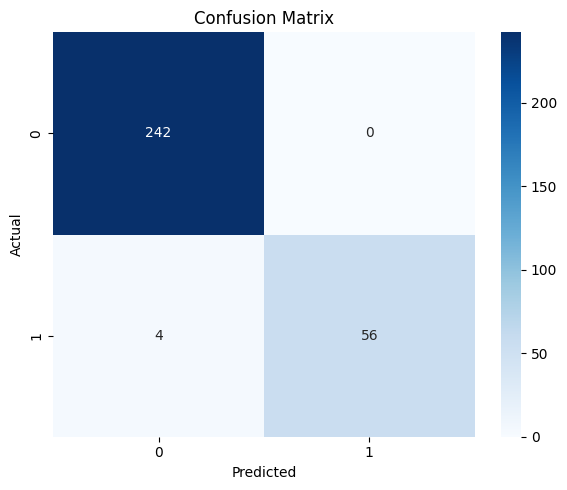

In [ ]:

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [ ]:
#Classification Report
report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print("\nClassification Report:")
print(report)

print('\n=================================')
print(f"Test accuracy: {accuracy_score(y_test, y_pred):.2%}")


Classification Report:
              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       242
     Class 1       1.00      0.93      0.97        60

    accuracy                           0.99       302
   macro avg       0.99      0.97      0.98       302
weighted avg       0.99      0.99      0.99       302


Test accuracy: 98.68%


#Evaluate Model Logistic Regression

สรุปผล  Model โดยมีข้อมูลชุด Test Set ทั้งหมด 302 รายการ

1. Accuracy  = 98.68%  ซึ่งหมายความว่า Model สามารถจำแนกข้อมูลได้ถูกต้องเกือบทั้งหมด

2. Negative Class  (Label:0 - Not Delayed)

    Precision = 98% → ทำนายว่า Order ไม่ Delay ถูกต้อง 98%

    Recall = 100% → สามารถจำแนก Class 0 - Not Delay  ได้ครบถ้วน  100%

3. Positive Class 1 (Label: 1 -Delayed)

    Precision = 100%  Model มีความสามารถในการทายข้อมูล Delay ได้ถูกต้องครบถ้วน

    Recall = 93% → Model ทำนายพลาดเล็กน้อย สามารถจำแนกรายการที่ Delay ได้เพียง 93% โดยมีทายผิดว่า เป็น Order ไม่ Delay ไป 4 รายการ


**สรุป**

โมเดลโดยรวมถือว่ามีประสิทธิภาพดี (Accuracy  = 98.68%)  
 แต่ยังมีปัญหาในการจำแนก Class 1 ที่เป็น minority class โดยมี Recall ที่ค่อนข้างต่ำ แสดงว่ามีหลายกรณีที่โมเดลคาดการณ์ผิดและไม่สามารถตรวจจับ Class 1 - Delay นี้ได้ครบ

#5.2. K-Nearest Neighbors (KNN) Model

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# สร้างและ train โมเดล KNN
X_train_KNN=X_train
X_test_KNN=X_test
y_train_KNN=y_train
y_test_KNN=y_test

#สร้างโมเดล
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_KNN, y_train_KNN)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

In [ ]:
# Predict Model
y_pred_KNN = knn.predict(X_test_KNN)

print("Train accuracy:", knn.score(X_train_KNN, y_train_KNN))
print("Test accuracy:",knn.score(X_test_KNN, y_test_KNN))


Train accuracy: 0.9686609686609686
Test accuracy: 0.9801324503311258


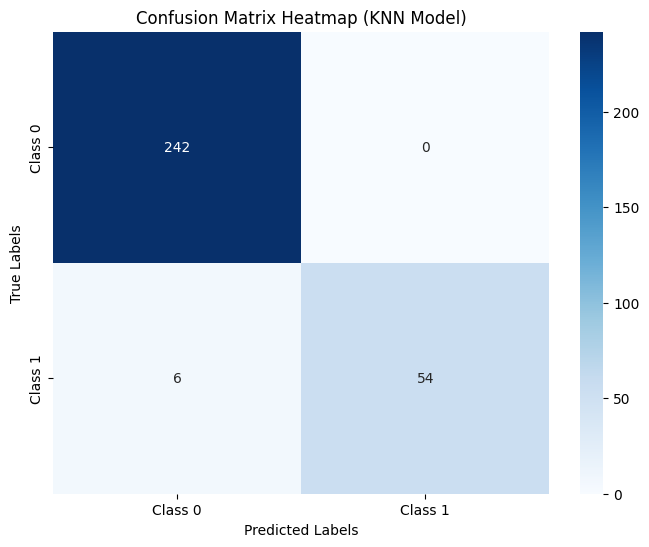


              precision    recall  f1-score   support

     Class 0       0.98      1.00      0.99       242
     Class 1       1.00      0.90      0.95        60

    accuracy                           0.98       302
   macro avg       0.99      0.95      0.97       302
weighted avg       0.98      0.98      0.98       302


Test accuracy: 98.01%


In [ ]:
# Compute confusion matrix and classification report
conf_matrix_KNN = confusion_matrix(y_test_KNN, y_pred_KNN)
report_KNN = classification_report(y_test_KNN, y_pred_KNN, target_names=['Class 0', 'Class 1'])


# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_KNN, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap (KNN Model)')
plt.show()

print('\n=================================')
# Display classification report
print(report_KNN)

print('\n=================================')

print(f"Test accuracy: {accuracy_score(y_test_KNN, y_pred_KNN):.2%}")

In [ ]:
#Add Grid Serach หา Parameter ที่ดีที่สุด

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# รวม ColumnTransformer และโมเดลด้วย Pipeline
pipeline_KNN = Pipeline([
    ('scaler',StandardScaler() ),
    ('model', KNeighborsClassifier())
])

param_grid_KNN = {
    'model__n_neighbors': [3, 5, 7,9,11,13,15,17,19,21]
}
grid_KNN =  GridSearchCV(pipeline_KNN, param_grid_KNN, cv=5, scoring='accuracy')

grid_KNN.fit(X_train_KNN, y_train_KNN)

/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.12/dist-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsClassifier())]),
             param_grid={'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19,
                                                21]},
             scoring='accuracy')

In [ ]:
# แสดงพารามิเตอร์ที่ดีที่สุด
print("Best parameters:", grid_KNN.best_params_)


Best parameters: {'model__n_neighbors': 7}


In [ ]:
from sklearn.metrics import confusion_matrix

# 1. ดึงโมเดลที่ดีที่สุด (Pipeline ที่ถูก Trained ด้วย Best Params)
best_model_KNN = grid_KNN.best_estimator_

# 2. ทำนายผลลัพธ์บนชุดทดสอบ (X_test)

y_pred_best_KNN = best_model_KNN.predict(X_test_KNN)

# 3. สร้าง Confusion Matrix
conf_matrix_best_KNN = confusion_matrix(y_test_KNN, y_pred_best_KNN)
report_Best_KNN = classification_report(y_test_KNN, y_pred_best_KNN, target_names=['Class 0', 'Class 1'])
print("Confusion Matrix for the Best Model:")
print(conf_matrix_best_KNN)

Confusion Matrix for the Best Model:
[[236   6]
 [ 15  45]]


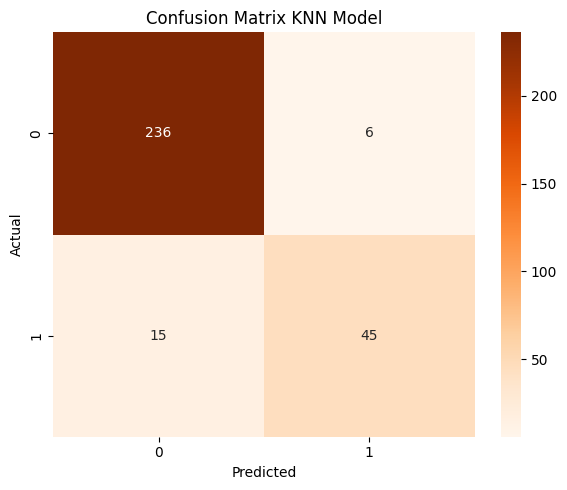


              precision    recall  f1-score   support

     Class 0       0.94      0.98      0.96       242
     Class 1       0.88      0.75      0.81        60

    accuracy                           0.93       302
   macro avg       0.91      0.86      0.88       302
weighted avg       0.93      0.93      0.93       302


Test accuracy: 93.05%


In [ ]:
#Plot Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_best_KNN, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix KNN Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


print('\n=================================')
# Display classification report
print(report_Best_KNN)
print('\n=================================')
print(f"Test accuracy: {accuracy_score(y_test_KNN, y_pred_best_KNN):.2%}")


#Evaluate Model KNN

สรุปผล  Model   K-Nearest Neighbors โดยมีข้อมูลชุด Test Set ทั้งหมด 302 รายการ

1. Accuracy  =  93.05%  ซึ่งหมายความว่า Model สามารถจำแนกข้อมูลได้ค่อนข้างดี


2. Negative Class  (Label:0 - Not Delayed)

    Precision = 94% → ทำนายว่า Order ไม่ Delay ถูกต้อง 94%

    Recall = 98% → สามารถจำแนก Class 0 - Not Delay  ได้เกือบครบถ้วน

3. Positive Class 1 (Label: 1 -Delayed)

    Precision = 88%  Model มีความสามารถในการทายข้อมูล Delay ได้ถูกต้องเพียง 88%

    Recall = 75% → Model ทำนายพลาดค่อนข้างเยอะ สามารถจำแนกรายการที่ Delay ได้เพียง 75% โดยมีทายพลาดไป 15 รายการ


**สรุป**

โมเดลโดยรวมถือว่ามีประสิทธิภาพเพียง  93.05%
 แต่ยังมีปัญหาในการจำแนก Class 1 ที่เป็น minority class โดยมี Recall ที่ต่ำมาห แสดงว่ามีหลายกรณีที่โมเดลคาดการณ์ผิดและไม่สามารถตรวจจับ Class 1 - Delay นี้ได้ครบ


#6. Summary

จากการพัฒนาและทดสอบโมเดล Machine Learning เพื่อทำนายโอกาสที่ออร์เดอร์พิซซ่าจะจัดส่งล่าช้า (Delayed) พบว่า โมเดล Logistic Regression เป็นโมเดลที่มีประสิทธิภาพสูงสุด โดยมี Accuracy สูงถึง 98.68%  ซึ่งถือว่ามีความน่าเชื่อถือสูงมากสำหรับการนำไปใช้งานจริง

📌 **รายละเอียดประสิทธิภาพของโมเดล (Performance Deep Dive)**

ได้เลือกใช้โมเดล Logistic Regression เป็น Model หลักเนื่องจากมีจุดเด่นในการ จำแนก Order Delay ได้ดีที่สุด เมื่อเทียบกับ Model K-Nearest Neighbors

1. ความแม่นยำในการแยกแยะ (Classification Performance):

กลุ่มจัดส่งตรงเวลา (Non-Delayed): โมเดลทำงานได้สมบูรณ์แบบ
*   Recall = 100%: จากออร์เดอร์ที่  Non-Delayed จริงทั้งหมด 242 รายการ
โมเดลสามารถจำแนกได้ครบถ้วนทุกรายการ
* Precision = 98% เมื่อ Model ทำนายว่า “Non-Delayedา” ส่วนใหญ่จะเป็นจริง และแทบไม่มีการทำนายผิดพลาด

กลุ่มจัดส่งล่าช้า (Delayed): จุดสำคัญทางธุรกิจ
*   Recall = 93%: จากออร์เดอร์ที่ Delay จริงทั้งหมด 60 รายการ
โมเดลสามารถจำแนกได้ถึง 54 รายการ หลุดรอดไปเพียง 4 รายการ

*   Precision = 100%: เมื่อ Model เตือนว่าจะ "Delay" มีความน่าเชื่อถือถึง 100%

2. ตารางสรุปความผิดพลาด (Confusion Matrix Analysis) จากข้อมูลทดสอบ 302 รายการ:

ทายถูก (Correct Predictions): 298 รายการ
*   ทายว่าไม่ช้า และไม่ช้าจริง: 242 รายการ
*   ทายว่าช้า และช้าจริง: 56 รายการ (เคสนี้สำคัญ เพราะช่วยให้ร้านแก้ปัญหาได้ทัน)

ทายผิด (Errors): เพียง 4 รายการ
*   False Negative (ความเสี่ยง): มีแค่ 4 รายการ ที่ล่าช้าจริงแต่โมเดลมองไม่เห็น ซึ่งถือว่าเป็นความเสี่ยงที่ต่ำมาก

📌 **ปัจจัยขับเคลื่อนความล่าช้า (Key Drivers)**
จากการวิเคราะห์ข้อมูล (EDA) พบว่าปัจจัยที่มีผลต่อความล่าช้ามากที่สุดคือ:

*   ระยะทาง (Distance): มีความสัมพันธ์โดยตรงกับเวลาจัดส่งอย่างชัดเจน (Correlation ~0.91) ยิ่งระยะทางไกล โอกาสล่าช้ายิ่งสูงแบบแปรผันตรง

*   ช่วงเวลา (Traffic & Peak Hour): ปริมาณการจราจรและช่วงเวลาเร่งด่วนมีผลกระทบรองลงมา

**ข้อเสนอแนะเชิงกลยุทธ์ (Strategic Recommendations)**
1. การนำไปใช้งาน (Deployment): แนะนำให้นำโมเดล Logistic Regression ไปใช้ในระบบรับออร์เดอร์

2. การบริหารจัดการลูกค้า (Customer Experience):
*   เมื่อโมเดลแจ้งเตือนว่าออร์เดอร์นี้มีแนวโน้ม "Delayed" (ซึ่งแม่นยำถึง 98%) ระบบสามารถ แจ้งเตือนลูกค้าล่วงหน้า หรือ เสนอโปรโมชั่นชดเชย ได้ทันที ก่อน ที่ลูกค้าจะร้องเรียน

*   ช่วยลดภาระ Call Center และเพิ่มความพึงพอใจของลูกค้าแม้ในกรณีที่เกิดความล่าช้า


หมายเหตุ: โมเดล KNN ที่ทดสอบเปรียบเทียบกัน มีความแม่นยำที่ 93.05% จึงตัดสินใจเลือก Logistic Regression เป็นโมเดลที่ดีที่สุด

📌 **ข้อสรุปเชิงบริหาร**

1. โมเดลที่ควรเลือกใช้:

*   Logistic Regression หลังปรับจูน (GridSearchCV + Cross-validation)
*   ให้ความแม่นยำโดยรวมสูงมาก (~99%) และตรวจจับออเดอร์เสี่ยงล่าช้าได้เกือบทั้งหมด

2. สิ่งที่โมเดลช่วยธุรกิจได้โดยตรง
*   ระบุ “ออเดอร์เสี่ยงล่าช้า” ล่วงหน้า ตั้งแต่ช่วงรับออเดอร์
*   รองรับการวางแผน เช่น
    *   จัดลำดับความสำคัญคิวจัดส่งให้เคสเสี่ยงสูง
    *   เพิ่มไรเดอร์/ใช้สาขาใกล้กว่าในช่วงเวลาและพื้นที่ที่มีความเสี่ยง
*   ช่วยลดโอกาส “ลูกค้าได้รับสินค้าเกินเวลามาตรฐาน” ซึ่งกระทบความพึงพอใจและภาพลักษณ์แบรนด์

3. บทบาทของ KNN
*   แม้จะมีประสิทธิภาพดี แต่ยังพลาดเคสล่าช้ามากกว่า Logistic
*   เหมาะใช้เป็น “โมเดลเปรียบเทียบ” เพื่อยืนยันว่า pattern ในข้อมูลมีความสอดคล้องกัน

📌 **ข้อเสนอแนะถัดไป**

*   นำโมเดล Logistic Regression ที่เลือก ไปทดสอบใน สภาพแวดล้อมจริง (Pilot)
    *   ทดสอบบนช่วงเวลา/พื้นที่บางส่วนก่อน
    *   วัดผลจริง: อัตราการส่งล่าช้าลดลงกี่เปอร์เซ็นต์หลังใช้โมเดลช่วยตัดสินใจ

*   เมื่อมั่นใจแล้ว สามารถต่อยอด:

    *   ผูกเข้ากับระบบจัดการออเดอร์ (Order Management System) ให้แจ้ง “Risk Score” ต่อออเดอร์แบบอัตโนมัติ

    *   ใช้ผลลัพธ์โมเดลเป็นข้อมูลประกอบการวางแผนกำลังคนรายวัน/รายช่วงเวลา